In [7]:
num_of_probes = 30 # Number of samples for averaging
num_of_target_probes = 211 # Number of target samples that will be written

In [8]:
import socket
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from datetime import datetime
from scipy.signal import butter, lfilter, freqz, filtfilt

In [9]:
#from scipy.signal import butter, lfilter, freqz, filtfilt
#from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def filterSignal(sig):
    filtered = sig
    filtered = butter_highpass_filter(filtered, 0.57, 250, order=4)
    filtered = butter_lowpass_filter(filtered, 15, 250, order=2)
    return filtered

In [10]:
def getData():
    data = sock.recv(1000000)
    str_data = data.decode("utf-8")[:-1]
    A=list(map(str, str_data.split(';')))
    result_data = []
    for i in range(len(A)):
        B=list(map(float, A[i].split(',')))
        result_data.append(B)
    df = pd.DataFrame(result_data)
    df = df.transpose()
    df.columns = ["Marker", "Detector 1", "Detector 2", "Detector 3", "Detector 4", "Detector 5", "Detector 6", "Detector 7", "Detector 8"]
    df['Time'] = range(len(df))
    df['Time'] *= 4
    df['Detector 1'] = filterSignal(df['Detector 1'])
    df['Detector 2'] = filterSignal(df['Detector 2'])
    df['Detector 3'] = filterSignal(df['Detector 3'])
    df['Detector 4'] = filterSignal(df['Detector 4'])
    df['Detector 5'] = filterSignal(df['Detector 5'])
    df['Detector 6'] = filterSignal(df['Detector 6'])
    df['Detector 7'] = filterSignal(df['Detector 7'])
    df['Detector 8'] = filterSignal(df['Detector 8'])
    return df

In [13]:
while(True):
    try:
        sock = socket.socket()
        sock.connect(('localhost', 9090))
        print('Connected')
        break
    except ConnectionRefusedError:
        pass

Connected


1 0 0 0 ALL_COUNTERS:  0 0
1 0 0 1 ALL_COUNTERS:  0 1
1 0 1 1 ALL_COUNTERS:  0 1
2 0 1 1 ALL_COUNTERS:  0 2
2 0 2 1 ALL_COUNTERS:  1 2
2 0 2 2 ALL_COUNTERS:  1 3
2 1 2 2 ALL_COUNTERS:  1 4
2 1 3 2 ALL_COUNTERS:  2 4
2 1 4 2 ALL_COUNTERS:  3 4
2 2 4 2 ALL_COUNTERS:  3 5
2 2 4 3 ALL_COUNTERS:  3 6
2 2 5 3 ALL_COUNTERS:  4 6
3 2 5 3 ALL_COUNTERS:  4 7
3 2 6 3 ALL_COUNTERS:  5 7
3 3 6 3 ALL_COUNTERS:  5 8
4 3 6 3 ALL_COUNTERS:  5 9
4 3 6 4 ALL_COUNTERS:  5 10
4 3 7 4 ALL_COUNTERS:  6 10
5 3 7 4 ALL_COUNTERS:  6 11
6 3 7 4 ALL_COUNTERS:  6 12
7 3 7 4 ALL_COUNTERS:  6 13
8 3 7 4 ALL_COUNTERS:  6 14
8 4 7 4 ALL_COUNTERS:  6 15
8 5 7 4 ALL_COUNTERS:  6 16
9 5 7 4 ALL_COUNTERS:  6 17
10 5 7 4 ALL_COUNTERS:  6 18
11 5 7 4 ALL_COUNTERS:  6 19
11 5 8 4 ALL_COUNTERS:  7 19
11 6 8 4 ALL_COUNTERS:  7 20
11 6 8 5 ALL_COUNTERS:  7 21
11 6 9 5 ALL_COUNTERS:  8 21
11 6 9 6 ALL_COUNTERS:  8 22
11 7 9 6 ALL_COUNTERS:  8 23
11 8 9 6 ALL_COUNTERS:  8 24
11 9 9 6 ALL_COUNTERS:  8 25
11 9 9 7 ALL_COUNTERS:  8 

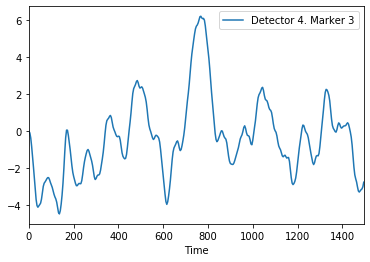

24 27 0 12 ALL_COUNTERS:  29 62
24 28 0 12 ALL_COUNTERS:  29 63
24 29 0 12 ALL_COUNTERS:  29 64
25 29 0 12 ALL_COUNTERS:  29 65


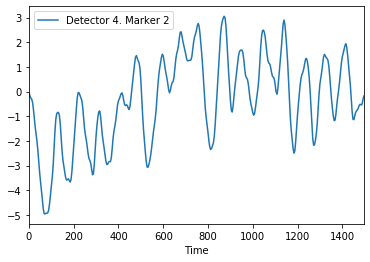

25 0 0 12 ALL_COUNTERS:  29 66
26 0 0 12 ALL_COUNTERS:  29 67
26 0 0 13 ALL_COUNTERS:  29 68
27 0 0 13 ALL_COUNTERS:  29 69
27 0 1 13 ALL_COUNTERS:  30 69
27 1 1 13 ALL_COUNTERS:  30 70
27 1 1 14 ALL_COUNTERS:  30 71
27 2 1 14 ALL_COUNTERS:  30 72
27 2 1 15 ALL_COUNTERS:  30 73
27 2 2 15 ALL_COUNTERS:  31 73
28 2 2 15 ALL_COUNTERS:  31 74
28 2 2 16 ALL_COUNTERS:  31 75
28 3 2 16 ALL_COUNTERS:  31 76
28 4 2 16 ALL_COUNTERS:  31 77
28 4 2 17 ALL_COUNTERS:  31 78
28 4 2 18 ALL_COUNTERS:  31 79
28 4 3 18 ALL_COUNTERS:  32 79
28 4 4 18 ALL_COUNTERS:  33 79
28 5 4 18 ALL_COUNTERS:  33 80
28 5 4 19 ALL_COUNTERS:  33 81
28 6 4 19 ALL_COUNTERS:  33 82
29 6 4 19 ALL_COUNTERS:  33 83


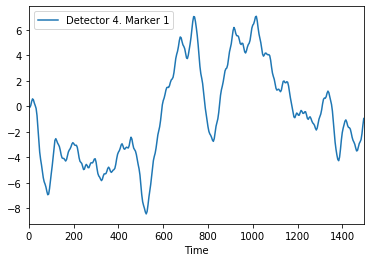

0 6 4 19 ALL_COUNTERS:  33 84
0 6 4 20 ALL_COUNTERS:  33 85
0 7 4 20 ALL_COUNTERS:  33 86
1 7 4 20 ALL_COUNTERS:  33 87
2 7 4 20 ALL_COUNTERS:  33 88
2 7 5 20 ALL_COUNTERS:  34 88
2 7 5 21 ALL_COUNTERS:  34 89
2 7 5 22 ALL_COUNTERS:  34 90
2 8 5 22 ALL_COUNTERS:  34 91
3 8 5 22 ALL_COUNTERS:  34 92
3 8 5 23 ALL_COUNTERS:  34 93
3 8 6 23 ALL_COUNTERS:  35 93
4 8 6 23 ALL_COUNTERS:  35 94
4 9 6 23 ALL_COUNTERS:  35 95
4 10 6 23 ALL_COUNTERS:  35 96
4 10 6 24 ALL_COUNTERS:  35 97
4 10 7 24 ALL_COUNTERS:  36 97
4 10 7 25 ALL_COUNTERS:  36 98
5 10 7 25 ALL_COUNTERS:  36 99
6 10 7 25 ALL_COUNTERS:  36 100
6 10 7 26 ALL_COUNTERS:  36 101
7 10 7 26 ALL_COUNTERS:  36 102
7 10 8 26 ALL_COUNTERS:  37 102
7 10 9 26 ALL_COUNTERS:  38 102
8 10 9 26 ALL_COUNTERS:  38 103
8 11 9 26 ALL_COUNTERS:  38 104
8 11 9 27 ALL_COUNTERS:  38 105
8 11 9 28 ALL_COUNTERS:  38 106
8 11 9 29 ALL_COUNTERS:  38 107
8 11 10 29 ALL_COUNTERS:  39 107
9 11 10 29 ALL_COUNTERS:  39 108
9 11 11 29 ALL_COUNTERS:  40 108
10 11 

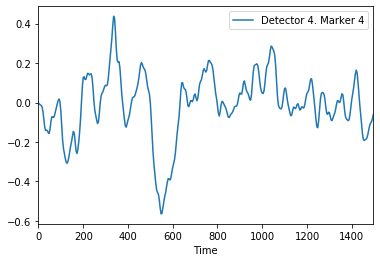

12 11 12 0 ALL_COUNTERS:  41 112
12 11 12 1 ALL_COUNTERS:  41 113
12 11 12 2 ALL_COUNTERS:  41 114
12 12 12 2 ALL_COUNTERS:  41 115
12 12 12 3 ALL_COUNTERS:  41 116
12 12 13 3 ALL_COUNTERS:  42 116
12 12 13 4 ALL_COUNTERS:  42 117
12 12 13 5 ALL_COUNTERS:  42 118
13 12 13 5 ALL_COUNTERS:  42 119
13 12 14 5 ALL_COUNTERS:  43 119
13 13 14 5 ALL_COUNTERS:  43 120
13 13 15 5 ALL_COUNTERS:  44 120
13 13 15 6 ALL_COUNTERS:  44 121
14 13 15 6 ALL_COUNTERS:  44 122
15 13 15 6 ALL_COUNTERS:  44 123
15 14 15 6 ALL_COUNTERS:  44 124
15 14 16 6 ALL_COUNTERS:  45 124
15 14 16 7 ALL_COUNTERS:  45 125
15 14 17 7 ALL_COUNTERS:  46 125
16 14 17 7 ALL_COUNTERS:  46 126
16 14 17 8 ALL_COUNTERS:  46 127
16 14 18 8 ALL_COUNTERS:  47 127
16 14 19 8 ALL_COUNTERS:  48 127
17 14 19 8 ALL_COUNTERS:  48 128
18 14 19 8 ALL_COUNTERS:  48 129
18 14 20 8 ALL_COUNTERS:  49 129
18 14 21 8 ALL_COUNTERS:  50 129
18 15 21 8 ALL_COUNTERS:  50 130
18 15 22 8 ALL_COUNTERS:  51 130
19 15 22 8 ALL_COUNTERS:  51 131
19 15 22 9

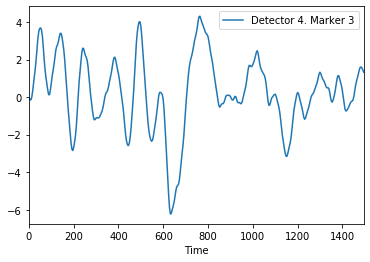

20 16 0 16 ALL_COUNTERS:  59 141
20 17 0 16 ALL_COUNTERS:  59 142
21 17 0 16 ALL_COUNTERS:  59 143
21 17 1 16 ALL_COUNTERS:  60 143
21 18 1 16 ALL_COUNTERS:  60 144
21 18 2 16 ALL_COUNTERS:  61 144
21 19 2 16 ALL_COUNTERS:  61 145
22 19 2 16 ALL_COUNTERS:  61 146
22 19 2 17 ALL_COUNTERS:  61 147
22 19 3 17 ALL_COUNTERS:  62 147
22 19 3 18 ALL_COUNTERS:  62 148
22 19 3 19 ALL_COUNTERS:  62 149
22 19 4 19 ALL_COUNTERS:  63 149
23 19 4 19 ALL_COUNTERS:  63 150
23 20 4 19 ALL_COUNTERS:  63 151
24 20 4 19 ALL_COUNTERS:  63 152
24 21 4 19 ALL_COUNTERS:  63 153
25 21 4 19 ALL_COUNTERS:  63 154
26 21 4 19 ALL_COUNTERS:  63 155
26 21 4 20 ALL_COUNTERS:  63 156
26 22 4 20 ALL_COUNTERS:  63 157
26 23 4 20 ALL_COUNTERS:  63 158
26 24 4 20 ALL_COUNTERS:  63 159
26 24 4 21 ALL_COUNTERS:  63 160
27 24 4 21 ALL_COUNTERS:  63 161
27 25 4 21 ALL_COUNTERS:  63 162
27 25 5 21 ALL_COUNTERS:  64 162
27 26 5 21 ALL_COUNTERS:  64 163
27 26 5 22 ALL_COUNTERS:  64 164
27 26 5 23 ALL_COUNTERS:  64 165
28 26 5 23

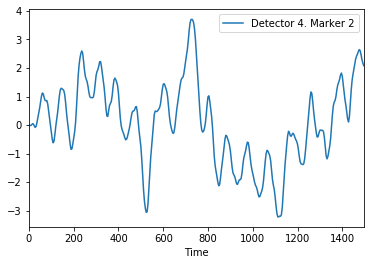

29 0 6 27 ALL_COUNTERS:  65 175


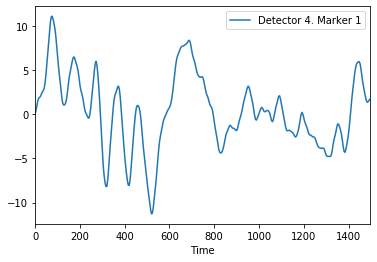

0 0 6 27 ALL_COUNTERS:  65 176
0 0 7 27 ALL_COUNTERS:  66 176
0 1 7 27 ALL_COUNTERS:  66 177
0 1 8 27 ALL_COUNTERS:  67 177
1 1 8 27 ALL_COUNTERS:  67 178
2 1 8 27 ALL_COUNTERS:  67 179
2 1 9 27 ALL_COUNTERS:  68 179
2 2 9 27 ALL_COUNTERS:  68 180
2 2 10 27 ALL_COUNTERS:  69 180
2 2 10 28 ALL_COUNTERS:  69 181
2 2 10 29 ALL_COUNTERS:  69 182
3 2 10 29 ALL_COUNTERS:  69 183
3 3 10 29 ALL_COUNTERS:  69 184


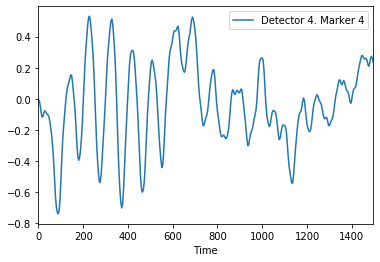

3 3 10 0 ALL_COUNTERS:  69 185
4 3 10 0 ALL_COUNTERS:  69 186
4 3 11 0 ALL_COUNTERS:  70 186
4 4 11 0 ALL_COUNTERS:  70 187
4 4 11 1 ALL_COUNTERS:  70 188
4 5 11 1 ALL_COUNTERS:  70 189
5 5 11 1 ALL_COUNTERS:  70 190
6 5 11 1 ALL_COUNTERS:  70 191
6 5 11 2 ALL_COUNTERS:  70 192
6 5 11 3 ALL_COUNTERS:  70 193
6 5 11 4 ALL_COUNTERS:  70 194
6 6 11 4 ALL_COUNTERS:  70 195
6 6 12 4 ALL_COUNTERS:  71 195
6 7 12 4 ALL_COUNTERS:  71 196
7 7 12 4 ALL_COUNTERS:  71 197
7 8 12 4 ALL_COUNTERS:  71 198
8 8 12 4 ALL_COUNTERS:  71 199
8 8 12 5 ALL_COUNTERS:  71 200
8 8 13 5 ALL_COUNTERS:  72 200
8 8 14 5 ALL_COUNTERS:  73 200
8 8 14 6 ALL_COUNTERS:  73 201
9 8 14 6 ALL_COUNTERS:  73 202
9 8 14 7 ALL_COUNTERS:  73 203
10 8 14 7 ALL_COUNTERS:  73 204
10 8 15 7 ALL_COUNTERS:  74 204
10 9 15 7 ALL_COUNTERS:  74 205
10 9 15 8 ALL_COUNTERS:  74 206
10 9 15 9 ALL_COUNTERS:  74 207
10 9 16 9 ALL_COUNTERS:  75 207
10 10 16 9 ALL_COUNTERS:  75 208
11 10 16 9 ALL_COUNTERS:  75 209
11 10 16 10 ALL_COUNTERS:  75

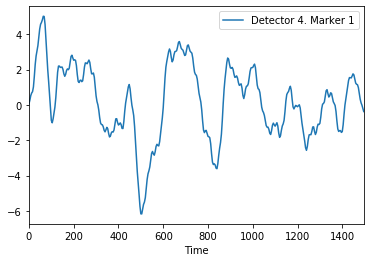

0 21 23 19 ALL_COUNTERS:  82 249
0 21 24 19 ALL_COUNTERS:  83 249
1 21 24 19 ALL_COUNTERS:  83 250
1 21 25 19 ALL_COUNTERS:  84 250
1 22 25 19 ALL_COUNTERS:  84 251
1 22 26 19 ALL_COUNTERS:  85 251
1 22 27 19 ALL_COUNTERS:  86 251
2 22 27 19 ALL_COUNTERS:  86 252
2 23 27 19 ALL_COUNTERS:  86 253
2 23 27 20 ALL_COUNTERS:  86 254
2 24 27 20 ALL_COUNTERS:  86 255
2 24 28 20 ALL_COUNTERS:  87 255
3 24 28 20 ALL_COUNTERS:  87 256
4 24 28 20 ALL_COUNTERS:  87 257
5 24 28 20 ALL_COUNTERS:  87 258
5 25 28 20 ALL_COUNTERS:  87 259
5 25 29 20 ALL_COUNTERS:  88 259
5 25 29 21 ALL_COUNTERS:  88 260
6 25 29 21 ALL_COUNTERS:  88 261
6 26 29 21 ALL_COUNTERS:  88 262


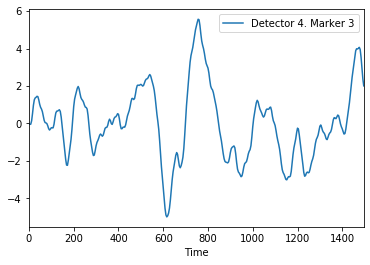

6 26 0 21 ALL_COUNTERS:  89 262
6 27 0 21 ALL_COUNTERS:  89 263
6 27 1 21 ALL_COUNTERS:  90 263
6 27 2 21 ALL_COUNTERS:  91 263
6 27 3 21 ALL_COUNTERS:  92 263
7 27 3 21 ALL_COUNTERS:  92 264
7 27 4 21 ALL_COUNTERS:  93 264
7 28 4 21 ALL_COUNTERS:  93 265
8 28 4 21 ALL_COUNTERS:  93 266
8 28 4 22 ALL_COUNTERS:  93 267
8 28 4 23 ALL_COUNTERS:  93 268
8 28 4 24 ALL_COUNTERS:  93 269
8 29 4 24 ALL_COUNTERS:  93 270


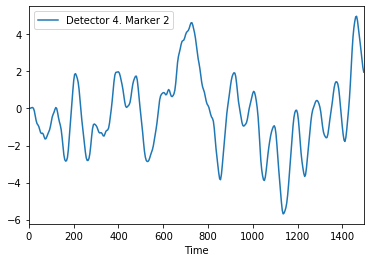

8 0 4 24 ALL_COUNTERS:  93 271
8 1 4 24 ALL_COUNTERS:  93 272
8 1 5 24 ALL_COUNTERS:  94 272
9 1 5 24 ALL_COUNTERS:  94 273
9 1 6 24 ALL_COUNTERS:  95 273
10 1 6 24 ALL_COUNTERS:  95 274
10 1 7 24 ALL_COUNTERS:  96 274
10 2 7 24 ALL_COUNTERS:  96 275
10 2 8 24 ALL_COUNTERS:  97 275
10 3 8 24 ALL_COUNTERS:  97 276
11 3 8 24 ALL_COUNTERS:  97 277
11 4 8 24 ALL_COUNTERS:  97 278
12 4 8 24 ALL_COUNTERS:  97 279
12 4 9 24 ALL_COUNTERS:  98 279
13 4 9 24 ALL_COUNTERS:  98 280
13 4 9 25 ALL_COUNTERS:  98 281
13 5 9 25 ALL_COUNTERS:  98 282
14 5 9 25 ALL_COUNTERS:  98 283
15 5 9 25 ALL_COUNTERS:  98 284
15 5 10 25 ALL_COUNTERS:  99 284
15 5 11 25 ALL_COUNTERS:  100 284
15 6 11 25 ALL_COUNTERS:  100 285
16 6 11 25 ALL_COUNTERS:  100 286
17 6 11 25 ALL_COUNTERS:  100 287
17 6 12 25 ALL_COUNTERS:  101 287
17 6 13 25 ALL_COUNTERS:  102 287
18 6 13 25 ALL_COUNTERS:  102 288
19 6 13 25 ALL_COUNTERS:  102 289
20 6 13 25 ALL_COUNTERS:  102 290
20 7 13 25 ALL_COUNTERS:  102 291
20 8 13 25 ALL_COUNTERS:

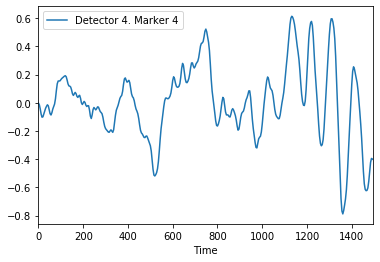

26 22 22 0 ALL_COUNTERS:  111 317
27 22 22 0 ALL_COUNTERS:  111 318
27 22 23 0 ALL_COUNTERS:  112 318
27 22 23 1 ALL_COUNTERS:  112 319
27 22 23 2 ALL_COUNTERS:  112 320
27 22 23 3 ALL_COUNTERS:  112 321
27 22 23 4 ALL_COUNTERS:  112 322
28 22 23 4 ALL_COUNTERS:  112 323
28 22 23 5 ALL_COUNTERS:  112 324
28 22 23 6 ALL_COUNTERS:  112 325
28 23 23 6 ALL_COUNTERS:  112 326
28 24 23 6 ALL_COUNTERS:  112 327
28 24 24 6 ALL_COUNTERS:  113 327
29 24 24 6 ALL_COUNTERS:  113 328
29 24 25 6 ALL_COUNTERS:  114 328
29 24 25 7 ALL_COUNTERS:  114 329
29 24 26 7 ALL_COUNTERS:  115 329
29 25 26 7 ALL_COUNTERS:  115 330


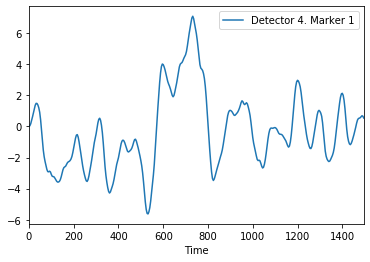

0 25 26 7 ALL_COUNTERS:  115 331
0 26 26 7 ALL_COUNTERS:  115 332
0 26 26 8 ALL_COUNTERS:  115 333
0 26 27 8 ALL_COUNTERS:  116 333
0 27 27 8 ALL_COUNTERS:  116 334
0 28 27 8 ALL_COUNTERS:  116 335
1 28 27 8 ALL_COUNTERS:  116 336
1 28 28 8 ALL_COUNTERS:  117 336
1 28 28 9 ALL_COUNTERS:  117 337
1 28 28 10 ALL_COUNTERS:  117 338
1 29 28 10 ALL_COUNTERS:  117 339
2 29 28 10 ALL_COUNTERS:  117 340
2 29 28 11 ALL_COUNTERS:  117 341
2 29 29 11 ALL_COUNTERS:  118 341
2 29 29 12 ALL_COUNTERS:  118 342
2 29 29 13 ALL_COUNTERS:  118 343
3 29 29 13 ALL_COUNTERS:  118 344


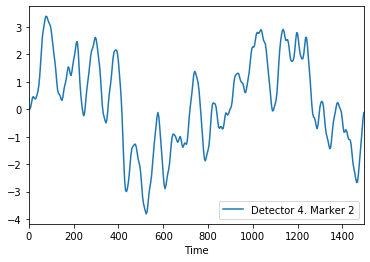

3 0 29 13 ALL_COUNTERS:  118 345
3 0 29 14 ALL_COUNTERS:  118 346
3 1 29 14 ALL_COUNTERS:  118 347


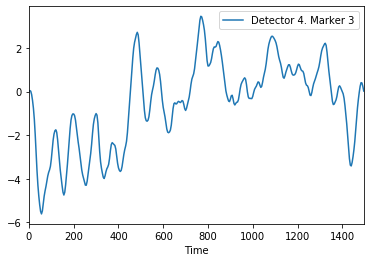

3 1 0 14 ALL_COUNTERS:  119 347
4 1 0 14 ALL_COUNTERS:  119 348
4 1 0 15 ALL_COUNTERS:  119 349
4 1 1 15 ALL_COUNTERS:  120 349
4 1 1 16 ALL_COUNTERS:  120 350
5 1 1 16 ALL_COUNTERS:  120 351
5 2 1 16 ALL_COUNTERS:  120 352
5 2 2 16 ALL_COUNTERS:  121 352
6 2 2 16 ALL_COUNTERS:  121 353
6 3 2 16 ALL_COUNTERS:  121 354
6 3 2 17 ALL_COUNTERS:  121 355
7 3 2 17 ALL_COUNTERS:  121 356
7 3 3 17 ALL_COUNTERS:  122 356
7 3 4 17 ALL_COUNTERS:  123 356
7 3 4 18 ALL_COUNTERS:  123 357
7 3 5 18 ALL_COUNTERS:  124 357
7 3 6 18 ALL_COUNTERS:  125 357
8 3 6 18 ALL_COUNTERS:  125 358
9 3 6 18 ALL_COUNTERS:  125 359
10 3 6 18 ALL_COUNTERS:  125 360
11 3 6 18 ALL_COUNTERS:  125 361
11 3 6 19 ALL_COUNTERS:  125 362
11 3 7 19 ALL_COUNTERS:  126 362
11 3 8 19 ALL_COUNTERS:  127 362
11 4 8 19 ALL_COUNTERS:  127 363
12 4 8 19 ALL_COUNTERS:  127 364
12 4 8 20 ALL_COUNTERS:  127 365
12 4 9 20 ALL_COUNTERS:  128 365
12 4 9 21 ALL_COUNTERS:  128 366
12 4 10 21 ALL_COUNTERS:  129 366
13 4 10 21 ALL_COUNTERS:  12

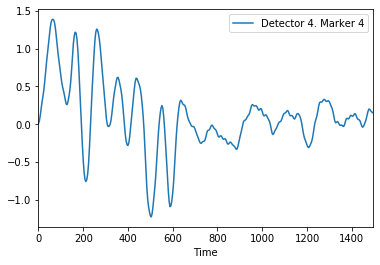

21 11 18 0 ALL_COUNTERS:  137 391
22 11 18 0 ALL_COUNTERS:  137 392
22 12 18 0 ALL_COUNTERS:  137 393
23 12 18 0 ALL_COUNTERS:  137 394
24 12 18 0 ALL_COUNTERS:  137 395
24 13 18 0 ALL_COUNTERS:  137 396
24 13 18 1 ALL_COUNTERS:  137 397
25 13 18 1 ALL_COUNTERS:  137 398
26 13 18 1 ALL_COUNTERS:  137 399
26 13 18 2 ALL_COUNTERS:  137 400
26 14 18 2 ALL_COUNTERS:  137 401
26 14 19 2 ALL_COUNTERS:  138 401
26 15 19 2 ALL_COUNTERS:  138 402
26 16 19 2 ALL_COUNTERS:  138 403
26 17 19 2 ALL_COUNTERS:  138 404
26 17 19 3 ALL_COUNTERS:  138 405
26 17 19 4 ALL_COUNTERS:  138 406
26 18 19 4 ALL_COUNTERS:  138 407
26 19 19 4 ALL_COUNTERS:  138 408
26 20 19 4 ALL_COUNTERS:  138 409
26 20 20 4 ALL_COUNTERS:  139 409
27 20 20 4 ALL_COUNTERS:  139 410
28 20 20 4 ALL_COUNTERS:  139 411
28 20 21 4 ALL_COUNTERS:  140 411
29 20 21 4 ALL_COUNTERS:  140 412
29 20 21 5 ALL_COUNTERS:  140 413
29 20 22 5 ALL_COUNTERS:  141 413
29 21 22 5 ALL_COUNTERS:  141 414
29 22 22 5 ALL_COUNTERS:  141 415
29 22 23 5 ALL

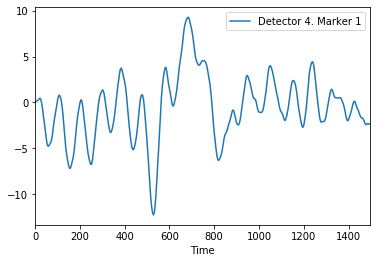

0 22 23 6 ALL_COUNTERS:  142 417
1 22 23 6 ALL_COUNTERS:  142 418
1 22 24 6 ALL_COUNTERS:  143 418
1 22 24 7 ALL_COUNTERS:  143 419
1 22 24 8 ALL_COUNTERS:  143 420
1 22 24 9 ALL_COUNTERS:  143 421
1 22 25 9 ALL_COUNTERS:  144 421
1 22 26 9 ALL_COUNTERS:  145 421
1 23 26 9 ALL_COUNTERS:  145 422
2 23 26 9 ALL_COUNTERS:  145 423
2 23 26 10 ALL_COUNTERS:  145 424
2 23 27 10 ALL_COUNTERS:  146 424
3 23 27 10 ALL_COUNTERS:  146 425
3 24 27 10 ALL_COUNTERS:  146 426
3 24 28 10 ALL_COUNTERS:  147 426
3 24 29 10 ALL_COUNTERS:  148 426
3 25 29 10 ALL_COUNTERS:  148 427
4 25 29 10 ALL_COUNTERS:  148 428
4 25 29 11 ALL_COUNTERS:  148 429


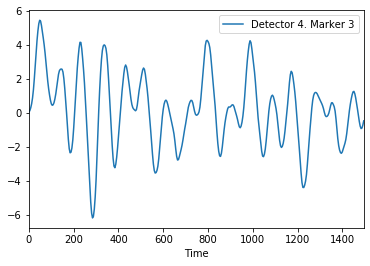

4 25 0 11 ALL_COUNTERS:  149 429
4 26 0 11 ALL_COUNTERS:  149 430
4 26 0 12 ALL_COUNTERS:  149 431
4 27 0 12 ALL_COUNTERS:  149 432
4 27 0 13 ALL_COUNTERS:  149 433
4 27 1 13 ALL_COUNTERS:  150 433
5 27 1 13 ALL_COUNTERS:  150 434
5 28 1 13 ALL_COUNTERS:  150 435
5 28 2 13 ALL_COUNTERS:  151 435
5 29 2 13 ALL_COUNTERS:  151 436
5 29 3 13 ALL_COUNTERS:  152 436
5 29 4 13 ALL_COUNTERS:  153 436


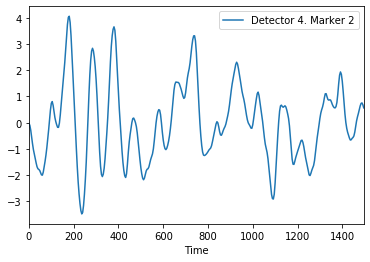

5 0 4 13 ALL_COUNTERS:  153 437
6 0 4 13 ALL_COUNTERS:  153 438
6 0 5 13 ALL_COUNTERS:  154 438
7 0 5 13 ALL_COUNTERS:  154 439
7 1 5 13 ALL_COUNTERS:  154 440
7 2 5 13 ALL_COUNTERS:  154 441
7 2 6 13 ALL_COUNTERS:  155 441
7 2 7 13 ALL_COUNTERS:  156 441
7 2 7 14 ALL_COUNTERS:  156 442
7 3 7 14 ALL_COUNTERS:  156 443
8 3 7 14 ALL_COUNTERS:  156 444
8 4 7 14 ALL_COUNTERS:  156 445
8 4 8 14 ALL_COUNTERS:  157 445
8 5 8 14 ALL_COUNTERS:  157 446
9 5 8 14 ALL_COUNTERS:  157 447
9 5 9 14 ALL_COUNTERS:  158 447
9 6 9 14 ALL_COUNTERS:  158 448
10 6 9 14 ALL_COUNTERS:  158 449
10 6 9 15 ALL_COUNTERS:  158 450
10 6 10 15 ALL_COUNTERS:  159 450
10 6 10 16 ALL_COUNTERS:  159 451
10 6 10 17 ALL_COUNTERS:  159 452
10 6 11 17 ALL_COUNTERS:  160 452
10 6 11 18 ALL_COUNTERS:  160 453
10 6 12 18 ALL_COUNTERS:  161 453
10 6 12 19 ALL_COUNTERS:  161 454
10 6 13 19 ALL_COUNTERS:  162 454
11 6 13 19 ALL_COUNTERS:  162 455
11 6 13 20 ALL_COUNTERS:  162 456
11 6 13 21 ALL_COUNTERS:  162 457
11 7 13 21 ALL_C

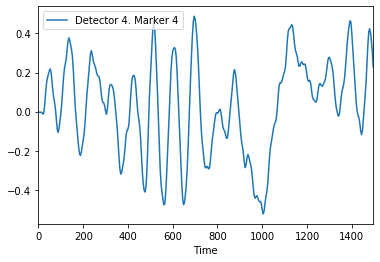

20 23 20 0 ALL_COUNTERS:  169 492
20 24 20 0 ALL_COUNTERS:  169 493
21 24 20 0 ALL_COUNTERS:  169 494
21 24 20 1 ALL_COUNTERS:  169 495
21 25 20 1 ALL_COUNTERS:  169 496
21 25 21 1 ALL_COUNTERS:  170 496
22 25 21 1 ALL_COUNTERS:  170 497
23 25 21 1 ALL_COUNTERS:  170 498
23 26 21 1 ALL_COUNTERS:  170 499
23 27 21 1 ALL_COUNTERS:  170 500
23 27 22 1 ALL_COUNTERS:  171 500
24 27 22 1 ALL_COUNTERS:  171 501
24 28 22 1 ALL_COUNTERS:  171 502
24 29 22 1 ALL_COUNTERS:  171 503
24 29 22 2 ALL_COUNTERS:  171 504


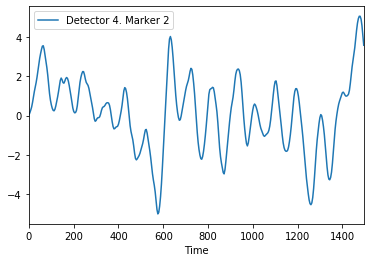

24 0 22 2 ALL_COUNTERS:  171 505
24 0 23 2 ALL_COUNTERS:  172 505
24 1 23 2 ALL_COUNTERS:  172 506
24 2 23 2 ALL_COUNTERS:  172 507
25 2 23 2 ALL_COUNTERS:  172 508
25 3 23 2 ALL_COUNTERS:  172 509
25 3 24 2 ALL_COUNTERS:  173 509
25 4 24 2 ALL_COUNTERS:  173 510
25 5 24 2 ALL_COUNTERS:  173 511
25 5 24 3 ALL_COUNTERS:  173 512
26 5 24 3 ALL_COUNTERS:  173 513
27 5 24 3 ALL_COUNTERS:  173 514
27 5 24 4 ALL_COUNTERS:  173 515
27 5 24 5 ALL_COUNTERS:  173 516
27 5 24 6 ALL_COUNTERS:  173 517
27 5 24 7 ALL_COUNTERS:  173 518
27 6 24 7 ALL_COUNTERS:  173 519
27 7 24 7 ALL_COUNTERS:  173 520
27 8 24 7 ALL_COUNTERS:  173 521
27 9 24 7 ALL_COUNTERS:  173 522
27 10 24 7 ALL_COUNTERS:  173 523
28 10 24 7 ALL_COUNTERS:  173 524
28 10 24 8 ALL_COUNTERS:  173 525
28 10 25 8 ALL_COUNTERS:  174 525
28 10 25 9 ALL_COUNTERS:  174 526
28 11 25 9 ALL_COUNTERS:  174 527
28 11 26 9 ALL_COUNTERS:  175 527
29 11 26 9 ALL_COUNTERS:  175 528
29 11 26 10 ALL_COUNTERS:  175 529
29 12 26 10 ALL_COUNTERS:  175 53

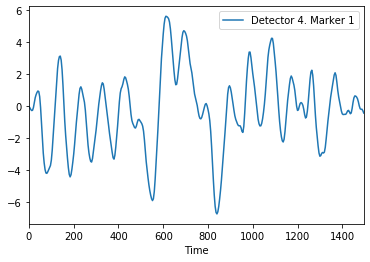

0 13 28 10 ALL_COUNTERS:  177 532
1 13 28 10 ALL_COUNTERS:  177 533
1 13 29 10 ALL_COUNTERS:  178 533


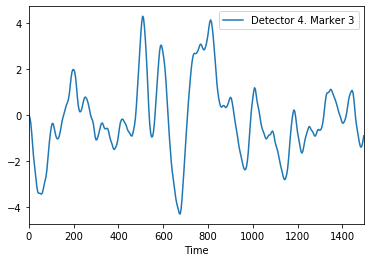

1 13 0 10 ALL_COUNTERS:  179 533
1 14 0 10 ALL_COUNTERS:  179 534
1 14 0 11 ALL_COUNTERS:  179 535
1 15 0 11 ALL_COUNTERS:  179 536
1 15 1 11 ALL_COUNTERS:  180 536
2 15 1 11 ALL_COUNTERS:  180 537
2 15 1 12 ALL_COUNTERS:  180 538
2 16 1 12 ALL_COUNTERS:  180 539
2 16 1 13 ALL_COUNTERS:  180 540
2 17 1 13 ALL_COUNTERS:  180 541
2 17 1 14 ALL_COUNTERS:  180 542
2 17 1 15 ALL_COUNTERS:  180 543
2 18 1 15 ALL_COUNTERS:  180 544
2 18 1 16 ALL_COUNTERS:  180 545
2 18 1 17 ALL_COUNTERS:  180 546
2 18 1 18 ALL_COUNTERS:  180 547
2 19 1 18 ALL_COUNTERS:  180 548
3 19 1 18 ALL_COUNTERS:  180 549
3 19 2 18 ALL_COUNTERS:  181 549
3 19 2 19 ALL_COUNTERS:  181 550
3 19 2 20 ALL_COUNTERS:  181 551
3 19 2 21 ALL_COUNTERS:  181 552
3 19 2 22 ALL_COUNTERS:  181 553
3 20 2 22 ALL_COUNTERS:  181 554
3 20 3 22 ALL_COUNTERS:  182 554
3 20 3 23 ALL_COUNTERS:  182 555
4 20 3 23 ALL_COUNTERS:  182 556
4 21 3 23 ALL_COUNTERS:  182 557
5 21 3 23 ALL_COUNTERS:  182 558
6 21 3 23 ALL_COUNTERS:  182 559
7 21 3 23 

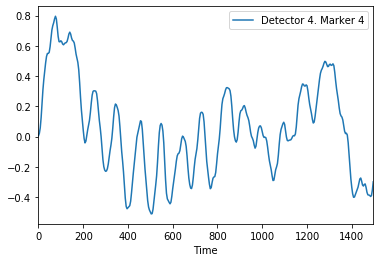

11 24 6 0 ALL_COUNTERS:  185 574
11 25 6 0 ALL_COUNTERS:  185 575
11 25 7 0 ALL_COUNTERS:  186 575
11 25 7 1 ALL_COUNTERS:  186 576
11 25 7 2 ALL_COUNTERS:  186 577
11 25 7 3 ALL_COUNTERS:  186 578
11 25 8 3 ALL_COUNTERS:  187 578
11 26 8 3 ALL_COUNTERS:  187 579
12 26 8 3 ALL_COUNTERS:  187 580
12 26 9 3 ALL_COUNTERS:  188 580
12 26 9 4 ALL_COUNTERS:  188 581
12 26 9 5 ALL_COUNTERS:  188 582
12 27 9 5 ALL_COUNTERS:  188 583
12 28 9 5 ALL_COUNTERS:  188 584
12 29 9 5 ALL_COUNTERS:  188 585


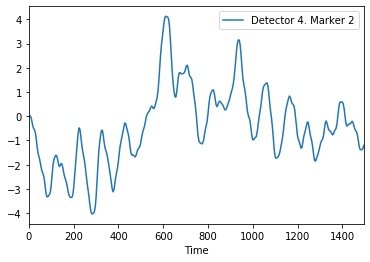

12 0 9 5 ALL_COUNTERS:  188 586
12 0 9 6 ALL_COUNTERS:  188 587
12 1 9 6 ALL_COUNTERS:  188 588
12 2 9 6 ALL_COUNTERS:  188 589
12 3 9 6 ALL_COUNTERS:  188 590
13 3 9 6 ALL_COUNTERS:  188 591
13 4 9 6 ALL_COUNTERS:  188 592
13 4 10 6 ALL_COUNTERS:  189 592
14 4 10 6 ALL_COUNTERS:  189 593
14 5 10 6 ALL_COUNTERS:  189 594
15 5 10 6 ALL_COUNTERS:  189 595
15 6 10 6 ALL_COUNTERS:  189 596
15 7 10 6 ALL_COUNTERS:  189 597
16 7 10 6 ALL_COUNTERS:  189 598
16 7 11 6 ALL_COUNTERS:  190 598
16 7 12 6 ALL_COUNTERS:  191 598
16 7 13 6 ALL_COUNTERS:  192 598
16 7 14 6 ALL_COUNTERS:  193 598
16 8 14 6 ALL_COUNTERS:  193 599
16 8 15 6 ALL_COUNTERS:  194 599
16 9 15 6 ALL_COUNTERS:  194 600
16 9 15 7 ALL_COUNTERS:  194 601
16 9 16 7 ALL_COUNTERS:  195 601
16 10 16 7 ALL_COUNTERS:  195 602
16 10 16 8 ALL_COUNTERS:  195 603
17 10 16 8 ALL_COUNTERS:  195 604
18 10 16 8 ALL_COUNTERS:  195 605
18 11 16 8 ALL_COUNTERS:  195 606
18 11 17 8 ALL_COUNTERS:  196 606
19 11 17 8 ALL_COUNTERS:  196 607
19 11 17 9

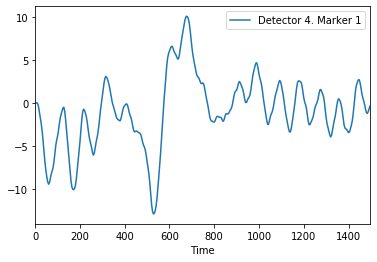

0 27 26 26 ALL_COUNTERS:  205 652
0 28 26 26 ALL_COUNTERS:  205 653
0 28 27 26 ALL_COUNTERS:  206 653
0 29 27 26 ALL_COUNTERS:  206 654
0 29 27 27 ALL_COUNTERS:  206 655
0 29 28 27 ALL_COUNTERS:  207 655


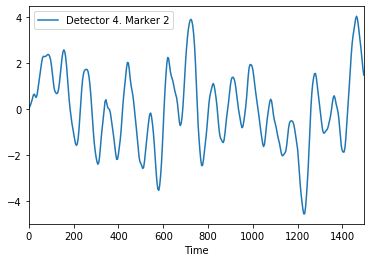

0 0 28 27 ALL_COUNTERS:  207 656
0 1 28 27 ALL_COUNTERS:  207 657
1 1 28 27 ALL_COUNTERS:  207 658
1 1 29 27 ALL_COUNTERS:  208 658


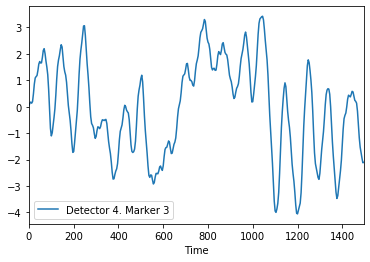

1 1 0 27 ALL_COUNTERS:  209 658
1 2 0 27 ALL_COUNTERS:  209 659
1 2 0 28 ALL_COUNTERS:  209 660
1 3 0 28 ALL_COUNTERS:  209 661
2 3 0 28 ALL_COUNTERS:  209 662
2 4 0 28 ALL_COUNTERS:  209 663
3 4 0 28 ALL_COUNTERS:  209 664
3 4 0 29 ALL_COUNTERS:  209 665
3 4 1 29 ALL_COUNTERS:  210 665
3 5 1 29 ALL_COUNTERS:  210 666


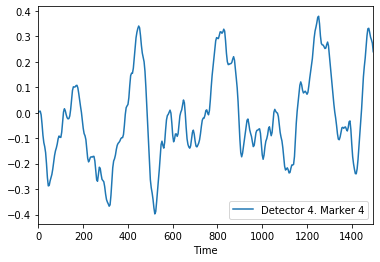

3 5 1 0 ALL_COUNTERS:  210 667
3 6 1 0 ALL_COUNTERS:  210 668
3 6 2 0 ALL_COUNTERS:  211 668
THATS ALL!


In [6]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_all = 0
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_3 = pd.DataFrame()
df_4 = pd.DataFrame()

df_all = pd.DataFrame()

df_all_target = pd.DataFrame()
df_all_non_target = pd.DataFrame()

df_all_target_counter = 0
df_all_non_target_counter = 0

while(True):
    df = getData()
    count_all += 1
    if (df_all.empty):
        df_all = df
    else:
        frames = [df_all, df]
        df_all = pd.concat(frames)
    
    if (df_all_target.empty and df['Marker'][100] == 3):
        #print('dd')
        df_all_target = df
    elif(df['Marker'][100] == 3):
        #print('kk')
        frames = [df_all_target, df]
        df_all_target = pd.concat(frames)
        df_all_target_counter += 1
        
    if (df_all_non_target.empty and df['Marker'][100] != 3):
        #print('zzzz')
        df_all_non_target = df
    elif(df['Marker'][100] != 3):
        #print('mmmmmm')
        frames = [df_all_non_target, df]
        df_all_non_target = pd.concat(frames)
        df_all_non_target_counter += 1
        
    
    if (df['Marker'][100] == 1):
        count_1 += 1
        #df.to_excel('RAW_DATA_1_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_1.empty):
            df_1 = df
        else:
            df_1 += df
    elif (df['Marker'][100] == 2):
        count_2 += 1
        #df.to_excel('RAW_DATA_2_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_2.empty):
            df_2 = df
        else:
            df_2 += df
    elif (df['Marker'][100] == 3):
        count_3 += 1
        #df.to_excel('RAW_DATA_3_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_3.empty):
            df_3 = df
        else:
            df_3 += df
    elif (df['Marker'][100] == 4):
        count_4 += 1
        #df.to_excel('RAW_DATA_4_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_4.empty):
            df_4 = df
        else:
            df_1 += df
    if (count_1 >= num_of_probes):
        df_1 /= num_of_probes
        df_1['Time'] = range(len(df_1))
        df_1['Time'] *= 4
        df_1.plot(x='Time', y='Detector 4', label='Detector 4. Marker 1')
        plt.show()
        df_1['Marker'] = df_1.where(df_1['Marker'] == 0, 1)
        #df_1['Time'] = range(len(df_1))
        df_1.to_excel('1_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_1 = 0
        df_1 = pd.DataFrame()
    elif (count_2 >= num_of_probes):
        df_2 /= num_of_probes
        df_2['Time'] = range(len(df_2))
        df_2['Time'] *= 4
        df_2.plot(x='Time', y='Detector 4', label='Detector 4. Marker 2')
        plt.show()
        #df_2['Marker'] = 2
        df_2['Marker'] = df_2.where(df_2['Marker'] == 0, 2)
        #df_2['Time'] = range(len(df_2))
        df_2.to_excel('2_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_2 = 0
        df_2 = pd.DataFrame()
    elif (count_3 >= num_of_probes):
        df_3 /= num_of_probes
        df_3['Time'] = range(len(df_3))
        df_3['Time'] *= 4
        df_3.plot(x='Time', y='Detector 4', label='Detector 4. Marker 3')
        plt.show()
        #df_3['Marker'] = 3
        df_3['Marker'] = df_3.where(df_3['Marker'] == 0, 3)
        #df_3['Time'] = range(len(df_3))
        df_3.to_excel('3_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_3 = 0
        df_3 = pd.DataFrame()
    elif (count_4 >= num_of_probes):
        df_4 /= num_of_probes
        df_4['Time'] = range(len(df_4))
        df_4['Time'] *= 4
        df_4.plot(x='Time', y='Detector 4', label='Detector 4. Marker 4')
        plt.show()
        #df_4['Marker'] = 4
        df_4['Marker'] = df_4.where(df_4['Marker'] == 0, 4)
        #df_4['Time'] = range(len(df_4))
        df_4.to_excel('4_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_4 = 0
        df_4 = pd.DataFrame()
    print(count_1,count_2,count_3,count_4, 'ALL_COUNTERS: ', df_all_target_counter, df_all_non_target_counter)
    if (df_all_target_counter >= num_of_target_probes):
        #df_all_target.to_excel('Danya//TARGET_DATA' + '.xlsx')
        #print('TARGET DATA SAVED')
        #df_all_target = pd.DataFrame()
        print('THATS ALL!')
        #df_all_non_target.to_excel('Danya//NON_TARGET_DATA' + '.xlsx')
        #print('NON TARGET DATA SAVED')
        break
        #df_all_non_target = pd.DataFrame()
    #print(count_all)
    '''if (count_all >= 120):
        df_all.to_excel('RAW_DATA_2' + '.xlsx')
        print('RAW DATA SAVED')
        df_all = pd.DataFrame()
        count_all = 0'''

df_11 = pd.DataFrame()
df_11 = pd.read_excel('3_2020-02-15-19-00-21.xlsx')
df_11.plot(y='Detector 6', x = 'Time')